## **Reading the Dataset as a DataFrame**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import io
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/Final Year Paper Work/Complete Summarized Dataset.xlsx', header=0,index_col=0)

df = df.dropna() # To remove any None values
df.head()

,Judgement,Domain,Judgement Status,Court,Abstractive Summarized Judgements,Extractive Summarized Judgements
Id,,,,,,
1,"""This was an appeal from a judgment and decree...",Civil,1,Supreme Court,In order to enforce war-time controls another ...,"According to the Respondent, on the 11th Augus..."
2,"""This was an application under article 32 (1) ...",Civil,2,Supreme Court,The second part of this bye-law clearly contem...,This is an application under article 32 of the...
3,"""APPEAL from a judgment of the High Court of H...",Civil,0,Supreme Court,The learned advocate for the appellant contend...,749 The sole point for determination in the ap...
4,"""APPEAL under article 374(4) of the Constituti...",Civil,0,Supreme Court,It has been held that the first appellate cour...,This objection was overruled by the court and ...
5,"""Petitions under Art. 136 of the Constitution ...",Criminal,3,Supreme Court,It was pointed out that in respect of convicti...,The petitioners have now filed their petitions...


##**Splitting the data for complete, extractive and abstractive summarized texts**

In [ ]:
# Complete Data
com_sentences = df[['Judgement','Judgement Status']]

# Abstractive Data
abs_sentences = df[['Abstractive Summarized Judgements','Judgement Status']]

# Extractive Data
ext_sentences = df[['Extractive Summarized Judgements','Judgement Status']]

from sklearn.model_selection import train_test_split

# Train and Test Split for Complete Data
df_train_com, df_test_com = train_test_split(com_sentences, test_size=0.25, random_state=42)

# Train and Test Split for Abstractive Data
df_train_abs, df_test_abs = train_test_split(abs_sentences, test_size=0.25, random_state=42)

# Train and Test Split for Extractive Data
df_train_ext, df_test_ext = train_test_split(ext_sentences, test_size=0.25, random_state=42)

## **Converting the Judgement Status to Categorical Values**

In [ ]:
from tensorflow.keras.utils import to_categorical

# Complete Data
y_train_com = to_categorical(df_train_com['Judgement Status'])
y_test_com = to_categorical(df_test_com['Judgement Status'])

# Abstractive Data
y_train_abs = to_categorical(df_train_abs['Judgement Status'])
y_test_abs = to_categorical(df_test_abs['Judgement Status'])

# Extractive Data
y_train_ext = to_categorical(df_train_ext['Judgement Status'])
y_test_ext = to_categorical(df_test_ext['Judgement Status'])

## **Import Statements**

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 60.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 97.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 35.5 MB/s eta 0:00:00


In [ ]:
# Import Statements
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
from tensorflow import keras
from tensorflow.keras.layers import Dense,Dropout, Input
from tqdm import tqdm
import pickle
from sklearn.metrics import confusion_matrix,f1_score,classification_report
import matplotlib.pyplot as plt
import itertools
from sklearn.utils import shuffle
from tensorflow.keras import regularizers
from transformers import BertConfig

In [ ]:
import transformers
from transformers import DistilBertTokenizer, TFDistilBertModel

dbert_tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
dbert_model = TFDistilBertModel.from_pretrained('distilbert-base-uncased')

loading file vocab.txt from cache at /root/.cache/huggingface/hub/models--distilbert-base-uncased/snapshots/6cdc0aad91f5ae2e6712e91bc7b65d1cf5c05411/vocab.txt
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--distilbert-base-uncased/snapshots/6cdc0aad91f5ae2e6712e91bc7b65d1cf5c05411/tokenizer_config.json
loading file tokenizer.json from cache at /root/.cache/huggingface/hub/models--distilbert-base-uncased/snapshots/6cdc0aad91f5ae2e6712e91bc7b65d1cf5c05411/tokenizer.json


loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--distilbert-base-uncased/snapshots/6cdc0aad91f5ae2e6712e91bc7b65d1cf5c05411/config.json
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.34.1",
  "vocab_size": 30522
}

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--distilbert-base-uncased/snapshots/6cdc0aad91f5ae2e6712e91bc7b65d1cf5c05411/config.json
Model config DistilBertConfig {
  "activation": "gelu",
  "architectures": [
    "DistilBer

loading weights file model.safetensors from cache at /root/.cache/huggingface/hub/models--distilbert-base-uncased/snapshots/6cdc0aad91f5ae2e6712e91bc7b65d1cf5c05411/model.safetensors
Loaded 66,362,880 parameters in the TF 2.0 model.
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If

##**1) Complete Data**

In [ ]:
df_com_dbert = df
df_com_dbert = df_com_dbert.rename(columns = {'Judgement Status': 'label', 'Judgement': 'text'}, inplace = False)
print('Available labels: ',df_com_dbert.label.unique())

num_classes_com_dbert = len(df_com_dbert.label.unique())
df_com_dbert.head()

Available labels:  [1 2 0 3]


,text,Domain,label,Court,Abstractive Summarized Judgements,Extractive Summarized Judgements
Id,,,,,,
1,"""This was an appeal from a judgment and decree...",Civil,1,Supreme Court,In order to enforce war-time controls another ...,"According to the Respondent, on the 11th Augus..."
2,"""This was an application under article 32 (1) ...",Civil,2,Supreme Court,The second part of this bye-law clearly contem...,This is an application under article 32 of the...
3,"""APPEAL from a judgment of the High Court of H...",Civil,0,Supreme Court,The learned advocate for the appellant contend...,749 The sole point for determination in the ap...
4,"""APPEAL under article 374(4) of the Constituti...",Civil,0,Supreme Court,It has been held that the first appellate cour...,This objection was overruled by the court and ...
5,"""Petitions under Art. 136 of the Constitution ...",Criminal,3,Supreme Court,It was pointed out that in respect of convicti...,The petitioners have now filed their petitions...


In [ ]:
max_len = 100
sentences_com_dbert = df_com_dbert['text']
labels_com_dbert = df_com_dbert['label']
len(sentences_com_dbert), len(labels_com_dbert)

(593, 593)

### **Checking if the Tokenizer is working well with out data by giving one sentence as input**

In [ ]:
dbert_tokenizer.tokenize(sentences_com_dbert[1])

dbert_inp_com = dbert_tokenizer.encode_plus(sentences_com_dbert[1],add_special_tokens = True,max_length =20,pad_to_max_length = True,truncation=True)
dbert_inp_com

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2606: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


{'input_ids': [101, 1000, 2023, 2001, 2019, 5574, 2013, 1037, 8689, 1998, 10037, 1997, 1996, 11831, 2152, 2457, 1006, 2962, 1039, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
id_inp_com_dbert = np.asarray(dbert_inp_com['input_ids'])
mask_inp_com_dbert = np.asarray(dbert_inp_com['attention_mask'])
out_com_dbert = dbert_model([id_inp_com_dbert.reshape(1,-1),mask_inp_com_dbert.reshape(1,-1)])
type(out_com_dbert),out_com_dbert

(transformers.modeling_tf_outputs.TFBaseModelOutput,
 TFBaseModelOutput(last_hidden_state=<tf.Tensor: shape=(1, 20, 768), dtype=float32, numpy=
 array([[[-7.8182295e-04, -8.9831524e-02, -2.4818353e-01, ...,
          -1.0402280e-01,  2.4073873e-01,  3.2960218e-01],
         [ 3.1278703e-01,  2.3781868e-02, -3.5902791e-02, ...,
           8.5552577e-03,  4.2641932e-01, -3.5093772e-01],
         [-3.6262584e-01, -4.9225649e-01, -1.7265227e-01, ...,
          -2.9220825e-01, -4.8407301e-02,  8.5687853e-02],
         ...,
         [ 9.7851142e-02,  4.7107946e-02, -4.3860339e-02, ...,
           1.0737013e-01,  6.9364741e-02,  3.0145671e-02],
         [ 1.8633118e-01, -8.4825508e-02, -8.7773204e-03, ...,
           2.0384666e-01,  3.2043797e-01, -3.1696782e-03],
         [ 8.0076772e-01,  3.0636020e-02, -1.0241170e-01, ...,
           1.6982479e-01, -3.7732732e-01, -4.5972034e-01]]], dtype=float32)>, hidden_states=None, attentions=None))

In [ ]:
dbert_tokenizer.decode(dbert_inp_com['input_ids'])

'[CLS] " this was an appeal from a judgment and decree of the bombay high court ( stone c [SEP]'

### **Since tokenizer is working well, run the tokenizer with all sentences**

In [ ]:
def create_model():
    inps = Input(shape = (max_len,), dtype='int64')
    masks= Input(shape = (max_len,), dtype='int64')
    dbert_layer = dbert_model(inps, attention_mask=masks)[0][:,0,:]
    dense = Dense(512,activation='relu',kernel_regularizer=regularizers.l2(0.01))(dbert_layer)
    dropout= Dropout(0.5)(dense)
    pred = Dense(4, activation='softmax',kernel_regularizer=regularizers.l2(0.01))(dropout)
    model = tf.keras.Model(inputs=[inps,masks], outputs=pred)
    print(model.summary())
    return model

model_com_dbert = create_model()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 100)]                0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 100)]                0         []                            
                                                                                                  
 tf_distil_bert_model (TFDi  TFBaseModelOutput(last_hid   6636288   ['input_3[0][0]',             
 stilBertModel)              den_state=(None, 100, 768)   0          'input_4[0][0]']             
                             , hidden_states=None, atte                                           
                             ntions=None)                                                   

In [ ]:
input_ids_com_dbert = []
attention_masks_com_dbert = []

for sent in sentences_com_dbert:
    dbert_inps_com = dbert_tokenizer.encode_plus(sent,add_special_tokens = True,max_length =max_len,pad_to_max_length = True,return_attention_mask = True,truncation=True)
    input_ids_com_dbert.append(dbert_inps_com['input_ids'])
    attention_masks_com_dbert.append(dbert_inps_com['attention_mask'])

input_ids_com_dbert = np.asarray(input_ids_com_dbert)
attention_masks_com_dbert = np.array(attention_masks_com_dbert)
labels_com_dbert = np.array(labels_com_dbert)
len(input_ids_com_dbert),len(attention_masks_com_dbert),len(labels_com_dbert)

(593, 593, 593)

In [ ]:
train_inp_com_dbert, val_inp_com_dbert, train_label_com_dbert, val_label_com_dbert, train_mask_com_dbert, val_mask_com_dbert = train_test_split(input_ids_com_dbert,labels_com_dbert,attention_masks_com_dbert,test_size=0.25)

print('Train inp shape {} Val input shape {}\nTrain label shape {} Val label shape {}\nTrain attention mask shape {} Val attention mask shape {}'.format(train_inp_com_dbert.shape,val_inp_com_dbert.shape,train_label_com_dbert.shape,val_label_com_dbert.shape,train_mask_com_dbert.shape,val_mask_com_dbert.shape))

loss_com_dbert = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric_com_dbert = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
optimizer_com_dbert = tf.keras.optimizers.Adam(learning_rate=3e-5)

model_com_dbert.compile(loss=loss_com_dbert, optimizer=optimizer_com_dbert, metrics=[metric_com_dbert])

Train inp shape (444, 100) Val input shape (149, 100)
Train label shape (444,) Val label shape (149,)
Train attention mask shape (444, 100) Val attention mask shape (149, 100)


In [ ]:
history_com_dbert = model_com_dbert.fit([train_inp_com_dbert,train_mask_com_dbert],train_label_com_dbert,batch_size = 32,epochs = 10,validation_data=([val_inp_com_dbert,val_mask_com_dbert],val_label_com_dbert))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


14/14 [==============================] - 35s 680ms/step - loss: 7.6668 - accuracy: 0.2320 - val_loss: 7.4820 - val_accuracy: 0.3020
Epoch 2/10
14/14 [==============================] - 5s 373ms/step - loss: 7.4218 - accuracy: 0.3649 - val_loss: 7.2955 - val_accuracy: 0.3758
Epoch 3/10
14/14 [==============================] - 5s 370ms/step - loss: 7.1779 - accuracy: 0.4392 - val_loss: 7.0475 - val_accuracy: 0.4765
Epoch 4/10
14/14 [==============================] - 5s 375ms/step - loss: 6.9410 - accuracy: 0.5225 - val_loss: 7.0652 - val_accuracy: 0.4631
Epoch 5/10
14/14 [==============================] - 5s 377ms/step - loss: 6.8179 - accuracy: 0.5721 - val_loss: 6.9718 - val_accuracy: 0.4027
Epoch 6/10
14/14 [==============================] - 5s 375ms/step - loss: 6.5808 - accuracy: 0.6892 - val_loss: 6.9900 - val_accuracy: 0.4094
Epoch 7/10
14/14 [==============================] - 5s 368ms/step - loss: 6.3636 - accuracy: 0.7905 - val_loss: 6.9775 - val_accuracy: 0.4295
Epoch 8/10
14/14

In [ ]:
preds_com_dbert = model_com_dbert.predict([val_inp_com_dbert,val_mask_com_dbert],batch_size=16)

10/10 [==============================] - 2s 60ms/step


In [ ]:
pred_labels_com_dbert = preds_com_dbert.argmax(axis=1)
f1_com_dbert = f1_score(val_label_com_dbert,pred_labels_com_dbert,average='weighted')
print("F1 Score: ",f1_com_dbert)

F1 Score:  0.4669700684067383


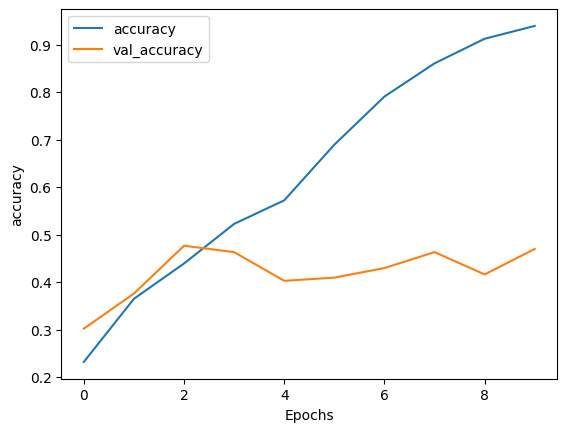

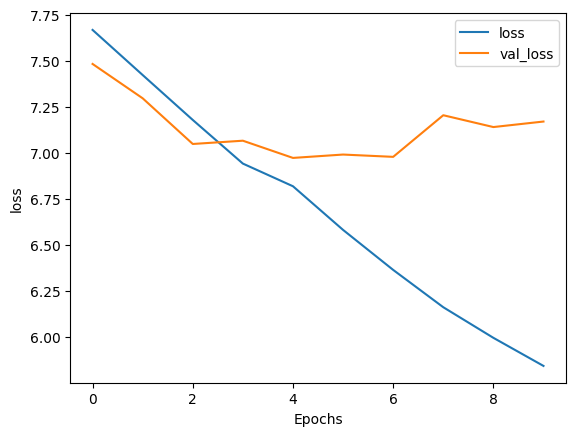

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history_com_dbert, "accuracy")
plot_graphs(history_com_dbert, "loss")

In [ ]:
model_com_dbert.save("/content/drive/MyDrive/Final Year Paper Work/H5 Files/COM-DISTILBERT.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##**2) Abstractive Summarized Data**


In [ ]:
df_abs_dbert = df
df_abs_dbert = df_abs_dbert.rename(columns = {'Judgement Status': 'label', 'Abstractive Summarized Judgements': 'text'}, inplace = False)
print('Available labels: ',df_abs_dbert.label.unique())

num_classes_abs__dbert = len(df_abs_dbert.label.unique())
df_abs_dbert.head()

Available labels:  [1 2 0 3]


,Judgement,Domain,label,Court,text,Extractive Summarized Judgements
Id,,,,,,
1,"""This was an appeal from a judgment and decree...",Civil,1,Supreme Court,In order to enforce war-time controls another ...,"According to the Respondent, on the 11th Augus..."
2,"""This was an application under article 32 (1) ...",Civil,2,Supreme Court,The second part of this bye-law clearly contem...,This is an application under article 32 of the...
3,"""APPEAL from a judgment of the High Court of H...",Civil,0,Supreme Court,The learned advocate for the appellant contend...,749 The sole point for determination in the ap...
4,"""APPEAL under article 374(4) of the Constituti...",Civil,0,Supreme Court,It has been held that the first appellate cour...,This objection was overruled by the court and ...
5,"""Petitions under Art. 136 of the Constitution ...",Criminal,3,Supreme Court,It was pointed out that in respect of convicti...,The petitioners have now filed their petitions...


In [ ]:
max_len = 100
sentences_abs_dbert = df_abs_dbert['text']
labels_abs_dbert = df_abs_dbert['label']
len(sentences_abs_dbert), len(labels_abs_dbert)

(593, 593)

### **Checking if the Tokenizer is working well with out data by giving one sentence as input**

In [ ]:
dbert_tokenizer.tokenize(sentences_abs_dbert[1])

dbert_inp_abs = dbert_tokenizer.encode_plus(sentences_abs_dbert[1],add_special_tokens = True,max_length =20,pad_to_max_length = True,truncation=True)
dbert_inp_abs

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2606: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


{'input_ids': [101, 1999, 2344, 2000, 16306, 2162, 1011, 2051, 7711, 2178, 7450, 1997, 1996, 9061, 1011, 4277, 2001, 2081, 13557, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
id_inp_abs_dbert = np.asarray(dbert_inp_abs['input_ids'])
mask_inp_abs_dbert = np.asarray(dbert_inp_abs['attention_mask'])
out_abs_dbert = dbert_model([id_inp_abs_dbert.reshape(1,-1),mask_inp_abs_dbert.reshape(1,-1)])
type(out_abs_dbert),out_abs_dbert

(transformers.modeling_tf_outputs.TFBaseModelOutput,
 TFBaseModelOutput(last_hidden_state=<tf.Tensor: shape=(1, 20, 768), dtype=float32, numpy=
 array([[[-0.1762825 , -0.69149995, -0.68487436, ..., -0.28315115,
          -0.39328098,  0.63575584],
         [-0.58517385, -0.18288757, -1.2146975 , ..., -0.13059634,
          -0.17110214,  0.06994294],
         [-0.28159255,  0.0167698 , -0.7815585 , ..., -0.5742621 ,
          -0.30710334,  0.04321972],
         ...,
         [-0.33596382, -0.17728846, -0.8129734 , ..., -0.37545496,
          -0.29984695,  0.5748093 ],
         [-0.8343904 , -0.1605057 , -0.823942  , ...,  0.12203944,
          -0.46052805,  0.42127037],
         [ 0.5005932 ,  0.28377616, -0.34192392, ..., -0.17705883,
          -0.51153934, -0.10764719]]], dtype=float32)>, hidden_states=None, attentions=None))

In [ ]:
dbert_tokenizer.decode(dbert_inp_abs['input_ids'])

'[CLS] in order to enforce war - time controls another amendment of the bye - laws was made whereby [SEP]'

### **Since tokenizer is working well, run the tokenizer with all sentences**

In [ ]:
def create_model():
    inps = Input(shape = (max_len,), dtype='int64')
    masks= Input(shape = (max_len,), dtype='int64')
    dbert_layer = dbert_model(inps, attention_mask=masks)[0][:,0,:]
    dense = Dense(512,activation='relu',kernel_regularizer=regularizers.l2(0.01))(dbert_layer)
    dropout= Dropout(0.5)(dense)
    pred = Dense(4, activation='softmax',kernel_regularizer=regularizers.l2(0.01))(dropout)
    model = tf.keras.Model(inputs=[inps,masks], outputs=pred)
    print(model.summary())
    return model

model_abs_dbert = create_model()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 100)]                0         []                            
                                                                                                  
 input_6 (InputLayer)        [(None, 100)]                0         []                            
                                                                                                  
 tf_distil_bert_model (TFDi  TFBaseModelOutput(last_hid   6636288   ['input_5[0][0]',             
 stilBertModel)              den_state=(None, 100, 768)   0          'input_6[0][0]']             
                             , hidden_states=None, atte                                           
                             ntions=None)                                                   

In [ ]:
input_ids_abs_dbert = []
attention_masks_abs_dbert = []

for sent in sentences_abs_dbert:
    dbert_inps_abs = dbert_tokenizer.encode_plus(sent,add_special_tokens = True,max_length =max_len,pad_to_max_length = True,return_attention_mask = True,truncation=True)
    input_ids_abs_dbert.append(dbert_inps_abs['input_ids'])
    attention_masks_abs_dbert.append(dbert_inps_abs['attention_mask'])

input_ids_abs_dbert = np.asarray(input_ids_abs_dbert)
attention_masks_abs_dbert = np.array(attention_masks_abs_dbert)
labels_abs_dbert = np.array(labels_abs_dbert)
len(input_ids_abs_dbert),len(attention_masks_abs_dbert),len(labels_abs_dbert)

(593, 593, 593)

In [ ]:
train_inp_abs_dbert, val_inp_abs_dbert, train_label_abs_dbert, val_label_abs_dbert, train_mask_abs_dbert, val_mask_abs_dbert = train_test_split(input_ids_abs_dbert,labels_abs_dbert,attention_masks_abs_dbert,test_size=0.25)

print('Train inp shape {} Val input shape {}\nTrain label shape {} Val label shape {}\nTrain attention mask shape {} Val attention mask shape {}'.format(train_inp_abs_dbert.shape,val_inp_abs_dbert.shape,train_label_abs_dbert.shape,val_label_abs_dbert.shape,train_mask_abs_dbert.shape,val_mask_abs_dbert.shape))

loss_abs_dbert = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric_abs_dbert = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
optimizer_abs_dbert = tf.keras.optimizers.Adam(learning_rate=3e-5)

model_abs_dbert.compile(loss=loss_abs_dbert, optimizer=optimizer_abs_dbert, metrics=[metric_abs_dbert])

Train inp shape (444, 100) Val input shape (149, 100)
Train label shape (444,) Val label shape (149,)
Train attention mask shape (444, 100) Val attention mask shape (149, 100)


In [ ]:
history_abs_dbert = model_abs_dbert.fit([train_inp_abs_dbert,train_mask_abs_dbert],train_label_abs_dbert,batch_size = 32,epochs = 10,validation_data=([val_inp_abs_dbert,val_mask_abs_dbert],val_label_abs_dbert))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


14/14 [==============================] - 30s 681ms/step - loss: 7.7141 - accuracy: 0.2995 - val_loss: 7.4831 - val_accuracy: 0.3423
Epoch 2/10
14/14 [==============================] - 6s 425ms/step - loss: 7.4340 - accuracy: 0.4595 - val_loss: 7.3852 - val_accuracy: 0.4094
Epoch 3/10
14/14 [==============================] - 6s 402ms/step - loss: 7.2311 - accuracy: 0.5225 - val_loss: 7.4086 - val_accuracy: 0.3490
Epoch 4/10
14/14 [==============================] - 5s 384ms/step - loss: 7.0695 - accuracy: 0.5968 - val_loss: 7.3999 - val_accuracy: 0.3289
Epoch 5/10
14/14 [==============================] - 5s 371ms/step - loss: 6.8710 - accuracy: 0.7185 - val_loss: 7.3302 - val_accuracy: 0.3826
Epoch 6/10
14/14 [==============================] - 5s 379ms/step - loss: 6.6786 - accuracy: 0.7883 - val_loss: 7.3246 - val_accuracy: 0.4094
Epoch 7/10
14/14 [==============================] - 5s 382ms/step - loss: 6.4846 - accuracy: 0.8739 - val_loss: 7.3950 - val_accuracy: 0.3758
Epoch 8/10
14/14

In [ ]:
preds_abs_dbert = model_abs_dbert.predict([val_inp_abs_dbert,val_mask_abs_dbert],batch_size=16)

10/10 [==============================] - 3s 65ms/step


In [ ]:
pred_labels_abs_dbert = preds_abs_dbert.argmax(axis=1)
f1_abs_dbert = f1_score(val_label_abs_dbert,pred_labels_abs_dbert,average='weighted')
print("F1 Score: ",f1_abs_dbert)

F1 Score:  0.3641927733091227


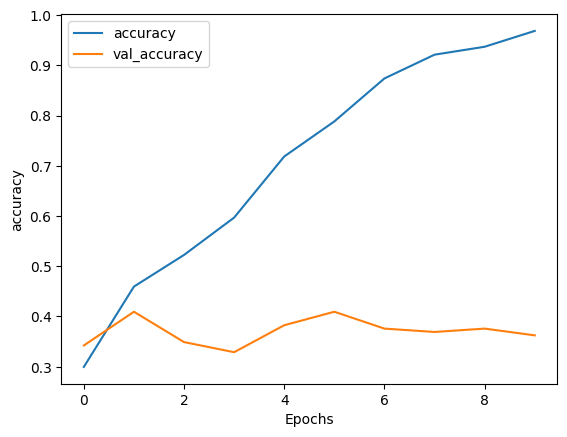

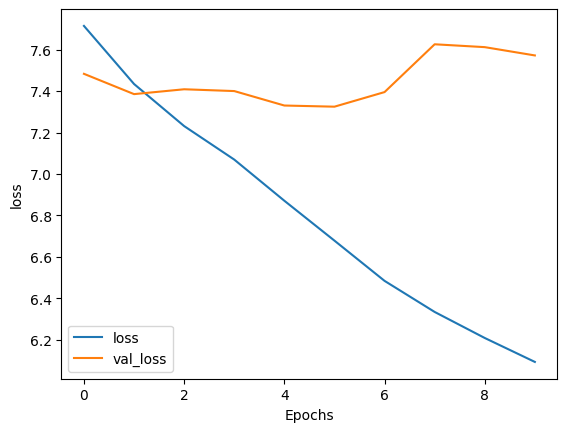

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history_abs_dbert, "accuracy")
plot_graphs(history_abs_dbert, "loss")

In [ ]:
model_abs_dbert.save("/content/drive/MyDrive/Final Year Paper Work/H5 Files/ABS-DISTILBERT.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## **3) Extractive Summarized Data**

In [ ]:
df_ext_dbert = df
df_ext_dbert = df_ext_dbert.rename(columns = {'Judgement Status': 'label', 'Extractive Summarized Judgements': 'text'}, inplace = False)
print('Available labels: ',df_ext_dbert.label.unique())

num_classes_ext_dbert = len(df_ext_dbert.label.unique())
df_ext_dbert.head()

Available labels:  [1 2 0 3]


,Judgement,Domain,label,Court,Abstractive Summarized Judgements,text
Id,,,,,,
1,"""This was an appeal from a judgment and decree...",Civil,1,Supreme Court,In order to enforce war-time controls another ...,"According to the Respondent, on the 11th Augus..."
2,"""This was an application under article 32 (1) ...",Civil,2,Supreme Court,The second part of this bye-law clearly contem...,This is an application under article 32 of the...
3,"""APPEAL from a judgment of the High Court of H...",Civil,0,Supreme Court,The learned advocate for the appellant contend...,749 The sole point for determination in the ap...
4,"""APPEAL under article 374(4) of the Constituti...",Civil,0,Supreme Court,It has been held that the first appellate cour...,This objection was overruled by the court and ...
5,"""Petitions under Art. 136 of the Constitution ...",Criminal,3,Supreme Court,It was pointed out that in respect of convicti...,The petitioners have now filed their petitions...


In [ ]:
max_len = 100
sentences_ext_dbert = df_ext_dbert['text']
labels_ext_dbert = df_ext_dbert['label']
len(sentences_ext_dbert), len(labels_ext_dbert)

(593, 593)

### **Checking if the Tokenizer is working well with out data by giving one sentence as input**

In [ ]:
dbert_tokenizer.tokenize(sentences_ext_dbert[1])

dbert_inp_ext = dbert_tokenizer.encode_plus(sentences_ext_dbert[1],add_special_tokens = True,max_length =20,pad_to_max_length = True,truncation=True)
dbert_inp_ext

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2606: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


{'input_ids': [101, 2429, 2000, 1996, 6869, 4765, 1010, 2006, 1996, 6252, 2257, 1010, 3386, 1010, 1996, 6869, 4765, 10290, 1996, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
id_inp_ext_dbert = np.asarray(dbert_inp_ext['input_ids'])
mask_inp_ext_dbert = np.asarray(dbert_inp_ext['attention_mask'])
out_ext_dbert = dbert_model([id_inp_ext_dbert.reshape(1,-1),mask_inp_ext_dbert.reshape(1,-1)])
type(out_ext_dbert),out_ext_dbert

(transformers.modeling_tf_outputs.TFBaseModelOutput,
 TFBaseModelOutput(last_hidden_state=<tf.Tensor: shape=(1, 20, 768), dtype=float32, numpy=
 array([[[ 2.3351672e-01, -1.6824777e-01, -1.1048106e+00, ...,
          -4.2158055e-01, -9.6697398e-03,  1.2390540e-01],
         [ 4.7601673e-01, -2.0889316e-02, -6.3918471e-01, ...,
           5.0263960e-02,  7.2109276e-01,  6.4474605e-02],
         [-2.7187413e-01, -1.7460845e-01, -7.6276326e-01, ...,
           7.3563848e-03,  6.6726428e-01,  6.0715854e-01],
         ...,
         [-2.2012444e-02, -3.5576108e-01, -3.6088115e-01, ...,
          -8.2278663e-01,  2.1764517e-01,  3.0448762e-01],
         [-9.0628362e-01, -7.5429702e-01, -4.7822136e-01, ...,
          -2.2306518e-01,  2.0198774e-01, -1.0509491e-03],
         [ 5.4791737e-02, -9.6493110e-02, -6.0384393e-01, ...,
          -2.6662102e-01, -2.4922210e-01, -3.1087121e-01]]], dtype=float32)>, hidden_states=None, attentions=None))

In [ ]:
dbert_tokenizer.decode(dbert_inp_ext['input_ids'])

'[CLS] according to the respondent, on the 11th august, 1945, the respondent instructed the [SEP]'

### **Since tokenizer is working well, run the tokenizer with all sentences**

In [ ]:
def create_model():
    inps = Input(shape = (max_len,), dtype='int64')
    masks= Input(shape = (max_len,), dtype='int64')
    dbert_layer = dbert_model(inps, attention_mask=masks)[0][:,0,:]
    dense = Dense(512,activation='relu',kernel_regularizer=regularizers.l2(0.01))(dbert_layer)
    dropout= Dropout(0.5)(dense)
    pred = Dense(4, activation='softmax',kernel_regularizer=regularizers.l2(0.01))(dropout)
    model = tf.keras.Model(inputs=[inps,masks], outputs=pred)
    print(model.summary())
    return model

model_ext_dbert = create_model()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 100)]                0         []                            
                                                                                                  
 input_8 (InputLayer)        [(None, 100)]                0         []                            
                                                                                                  
 tf_distil_bert_model (TFDi  TFBaseModelOutput(last_hid   6636288   ['input_7[0][0]',             
 stilBertModel)              den_state=(None, 100, 768)   0          'input_8[0][0]']             
                             , hidden_states=None, atte                                           
                             ntions=None)                                                   

In [ ]:
input_ids_ext_dbert = []
attention_masks_ext_dbert = []

for sent in sentences_ext_dbert:
    dbert_inps_ext = dbert_tokenizer.encode_plus(sent,add_special_tokens = True,max_length =max_len,pad_to_max_length = True,return_attention_mask = True,truncation=True)
    input_ids_ext_dbert.append(dbert_inps_ext['input_ids'])
    attention_masks_ext_dbert.append(dbert_inps_ext['attention_mask'])

input_ids_ext_dbert = np.asarray(input_ids_ext_dbert)
attention_masks_ext_dbert = np.array(attention_masks_ext_dbert)
labels_ext_dbert = np.array(labels_ext_dbert)
len(input_ids_ext_dbert),len(attention_masks_ext_dbert),len(labels_ext_dbert)

(593, 593, 593)

In [ ]:
train_inp_ext_dbert, val_inp_ext_dbert, train_label_ext_dbert, val_label_ext_dbert, train_mask_ext_dbert, val_mask_ext_dbert = train_test_split(input_ids_ext_dbert,labels_ext_dbert,attention_masks_ext_dbert,test_size=0.25)

print('Train inp shape {} Val input shape {}\nTrain label shape {} Val label shape {}\nTrain attention mask shape {} Val attention mask shape {}'.format(train_inp_ext_dbert.shape,val_inp_ext_dbert.shape,train_label_ext_dbert.shape,val_label_ext_dbert.shape,train_mask_ext_dbert.shape,val_mask_ext_dbert.shape))

loss_ext_dbert = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric_ext_dbert = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
optimizer_ext_dbert = tf.keras.optimizers.Adam(learning_rate=3e-5)

model_ext_dbert.compile(loss=loss_ext_dbert, optimizer=optimizer_ext_dbert, metrics=[metric_ext_dbert])

Train inp shape (444, 100) Val input shape (149, 100)
Train label shape (444,) Val label shape (149,)
Train attention mask shape (444, 100) Val attention mask shape (149, 100)


In [ ]:
history_ext_dbert = model_ext_dbert.fit([train_inp_ext_dbert,train_mask_ext_dbert],train_label_ext_dbert,batch_size = 32,epochs = 10,validation_data=([val_inp_ext_dbert,val_mask_ext_dbert],val_label_ext_dbert))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


14/14 [==============================] - 28s 554ms/step - loss: 7.6098 - accuracy: 0.3716 - val_loss: 7.3260 - val_accuracy: 0.4631
Epoch 2/10
14/14 [==============================] - 5s 360ms/step - loss: 7.2800 - accuracy: 0.4955 - val_loss: 7.2462 - val_accuracy: 0.4899
Epoch 3/10
14/14 [==============================] - 5s 371ms/step - loss: 7.0793 - accuracy: 0.5856 - val_loss: 7.2535 - val_accuracy: 0.4362
Epoch 4/10
14/14 [==============================] - 5s 372ms/step - loss: 6.9067 - accuracy: 0.6712 - val_loss: 7.2547 - val_accuracy: 0.4430
Epoch 5/10
14/14 [==============================] - 5s 377ms/step - loss: 6.6393 - accuracy: 0.8176 - val_loss: 7.2638 - val_accuracy: 0.4430
Epoch 6/10
14/14 [==============================] - 5s 376ms/step - loss: 6.4441 - accuracy: 0.8986 - val_loss: 7.3094 - val_accuracy: 0.4564
Epoch 7/10
14/14 [==============================] - 5s 374ms/step - loss: 6.2881 - accuracy: 0.9550 - val_loss: 7.3882 - val_accuracy: 0.4497
Epoch 8/10
14/14

In [ ]:
preds_ext_dbert = model_ext_dbert.predict([val_inp_dbert_ext_dbert,val_mask_ext_dbert],batch_size=16)

10/10 [==============================] - 2s 64ms/step


In [ ]:
pred_labels_ext_dbert = preds_ext_dbert.argmax(axis=1)
f1_ext_dbert = f1_score(val_label_ext_dbert,pred_labels_ext_dbert,average='weighted')
print("F1 Score: ",f1_ext_dbert)

F1 Score:  0.4096533120305186


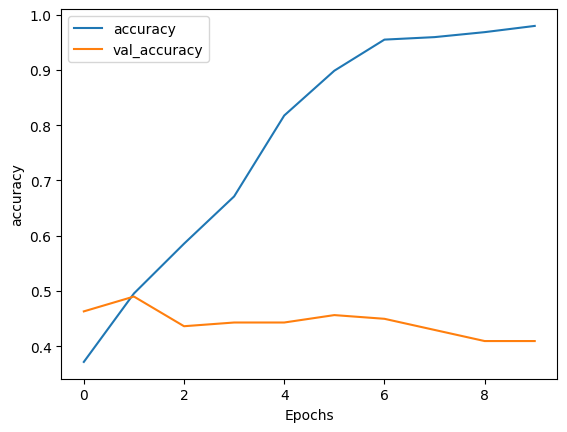

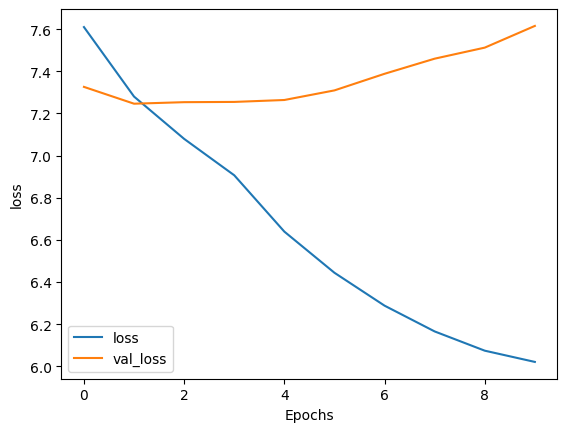

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history_ext_dbert, "accuracy")
plot_graphs(history_ext_dbert, "loss")

In [ ]:
model_ext_dbert.save("/content/drive/MyDrive/Final Year Paper Work/H5 Files/EXT-DISTILBERT.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
